# Session 10 SHP - Machine Learning

## Linear Regression

Dalam Machine Learning, Linear Regression adalah metode untuk memprediksi nilai numerik berdasarkan hubungan linier antara variabel independen (fitur) dan variabel dependen (target).

**Analisis Efisiensi Energi Kompressor**
* **Deskripsi**: Memfokuskan pada bagaimana regresi linear dapat membantu dalam memahami konsumsi energi kompresor. Pengetahuan ini dapat digunakan untuk mengidentifikasi cara-cara mengurangi konsumsi energi dan meningkatkan efisiensi operasional.
* **Target**: Ampere Kompressor
* **Fitur Potensial**:
  * **Discharge Temperature dan Suction Temperature**: Suhu ini memberikan informasi tentang kondisi termal di dalam kompresor, yang mempengaruhi efisiensi dan konsumsi energi.
  * **Oil Pressure**: Tekanan oli berhubungan dengan kondisi operasional kompresor dan dapat mempengaruhi konsumsi energi.
  * **Cond Sat Temperature**: Suhu kondensator juga mempengaruhi beban termal dan efisiensi kompresor.

## 1. Load Dataset "Chiller.xlsx"

**ChatGPT Prompt:**

Berikan saya code python untuk menghubungkan google colab dengan google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**ChatGPT Prompt:**

Berikan code untuk load dataset "Chiller.xlsx' pada folder Dataset di google drive

In [2]:
# Mengimpor library pandas
import pandas as pd

# Menentukan path file Excel
file_path = '/content/drive/MyDrive/Dataset/Chiller.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama dari dataframe
df.head()

,Evap LWT,Evap EWT,Unit Capacity,Evap Sat Temperature,Cond Sat Temperature,Suction Temperature,Discharge Temperature,Oil Pressure,Run Hour Kompressor,Ampere Kompressor,"No, Of Start",Tekanan Return Chiller,Tekanan Supply Chiller,Inlet Softwater,Tekanan Sebelum Pompa,Tekanan Sesudah Pompa,Ampere R-S,Ampere S-T
0,5.8,9.7,44.0,1.6,44.9,6.6,63.6,1007.2,17924,133.6,1336,5.0,4.6,3.0,4.6,6.4,143.0,146.2
1,5.8,9.8,46.0,1.4,44.9,6.6,63.9,1007.2,17926,134.5,1336,5.0,4.6,3.0,4.6,6.4,121.0,116.2
2,5.8,9.8,46.0,2.3,44.2,7.6,62.5,976.4,17927,132.7,1336,5.0,4.6,3.0,4.6,6.4,134.2,133.5
3,6.1,10.4,46.0,2.3,40.4,6.8,60.6,844.0,17930,120.4,1336,5.0,4.6,3.0,4.6,6.4,134.2,133.5
4,5.8,9.9,48.0,2.0,39.8,7.0,59.3,968.5,17931,118.5,1336,5.0,4.6,3.0,4.6,6.4,134.2,133.5


## 2. EDA (Exploratory Data Analysis)

**ChatGPT Prompt:**

Berikan code untuk melakukan EDA pada dataset tersebut

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Evap LWT                1219 non-null   float64
 1   Evap EWT                1219 non-null   float64
 2   Unit Capacity           1219 non-null   float64
 3   Evap Sat Temperature    1219 non-null   float64
 4   Cond Sat Temperature    1219 non-null   float64
 5   Suction Temperature     1219 non-null   float64
 6   Discharge Temperature   1219 non-null   float64
 7   Oil Pressure            1219 non-null   float64
 8   Run Hour Kompressor     1219 non-null   int64  
 9   Ampere Kompressor       1219 non-null   float64
 10  No, Of Start            1219 non-null   int64  
 11  Tekanan Return Chiller  1219 non-null   float64
 12  Tekanan Supply Chiller  1219 non-null   float64
 13  Inlet Softwater         1219 non-null   float64
 14  Tekanan Sebelum Pompa

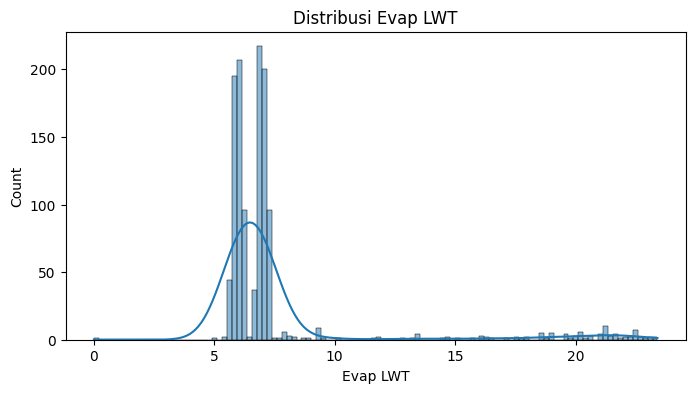

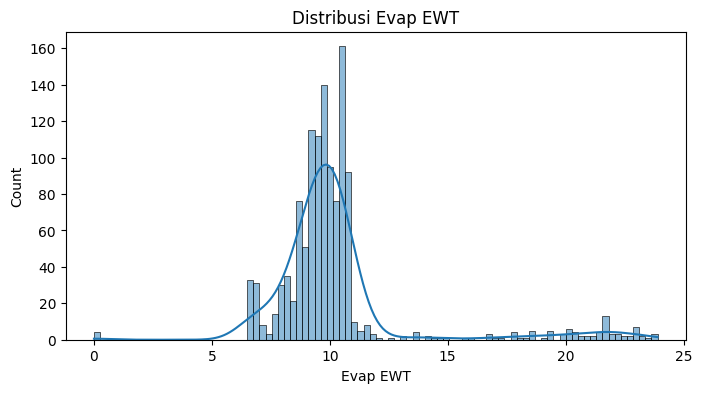

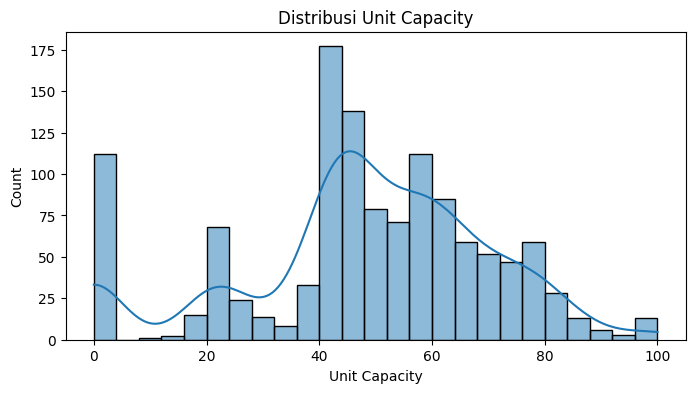

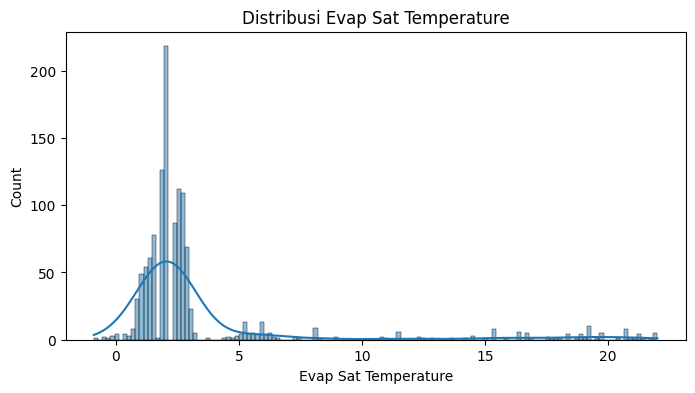

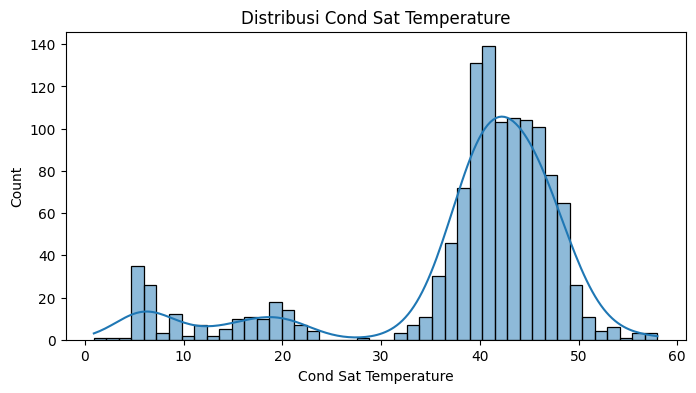

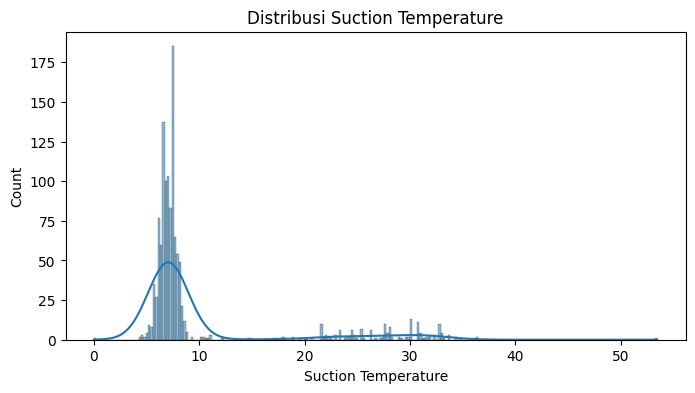

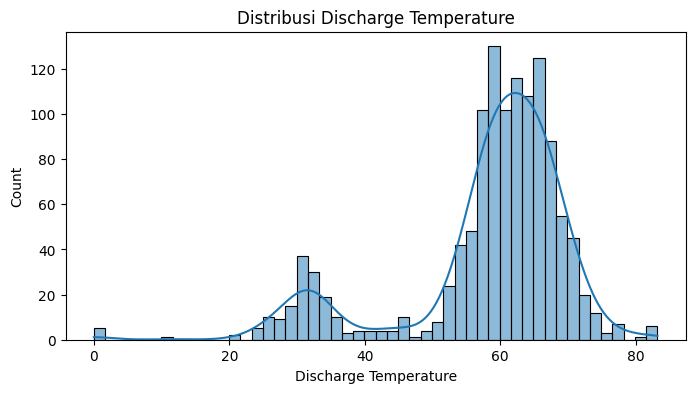

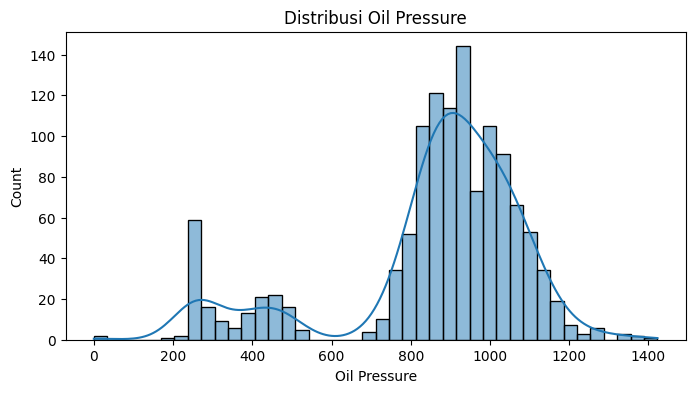

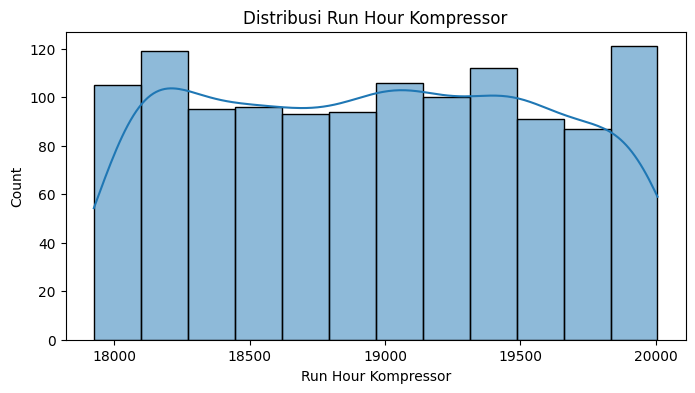

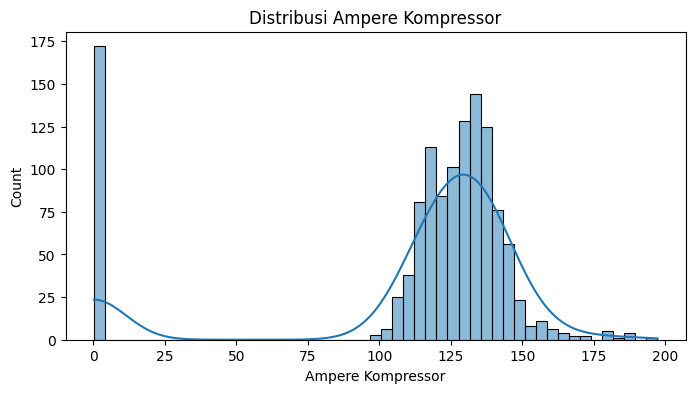

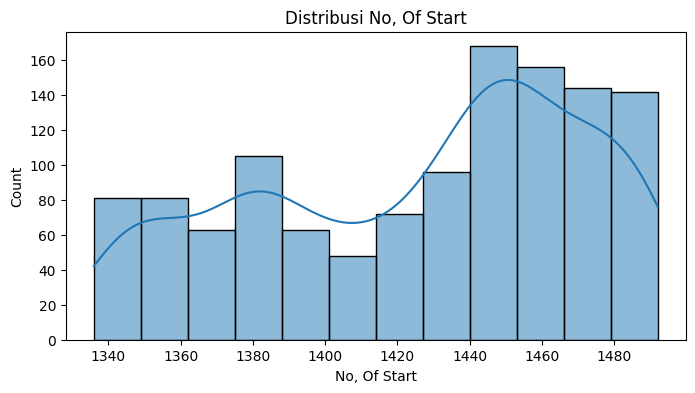

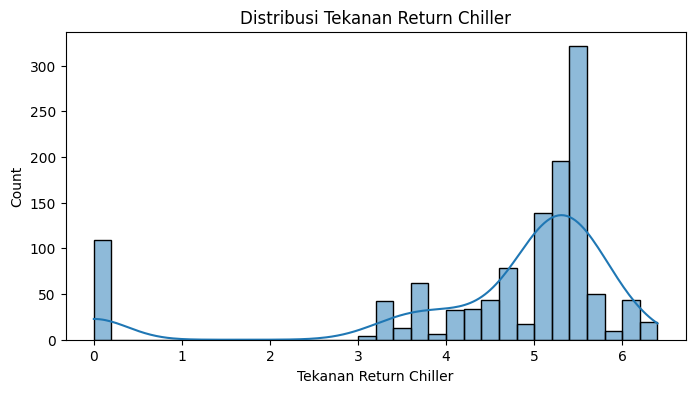

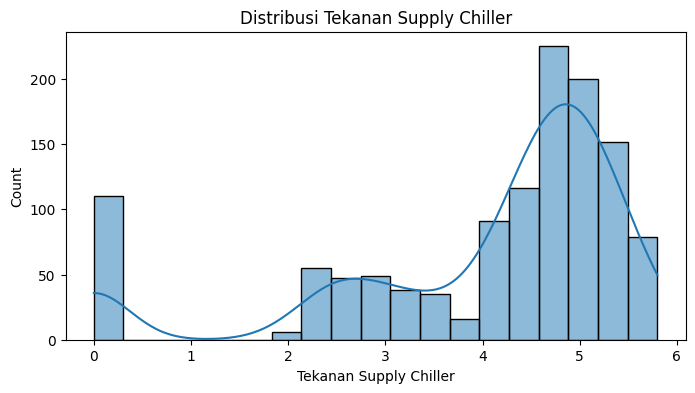

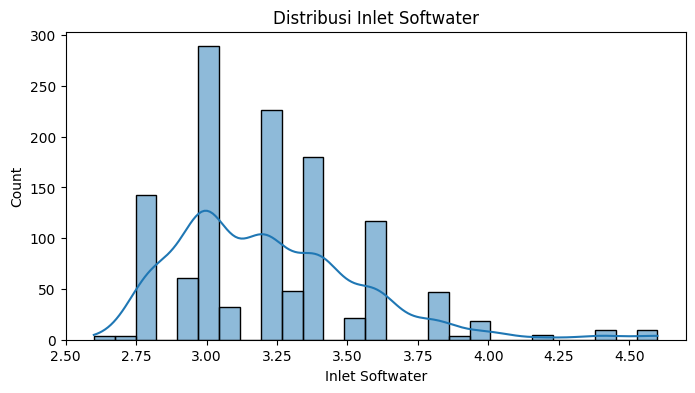

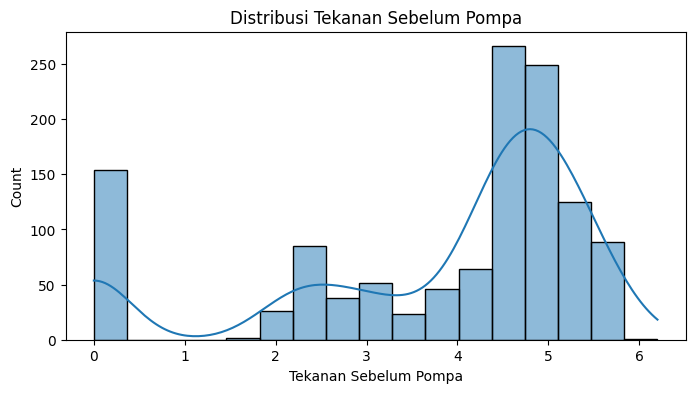

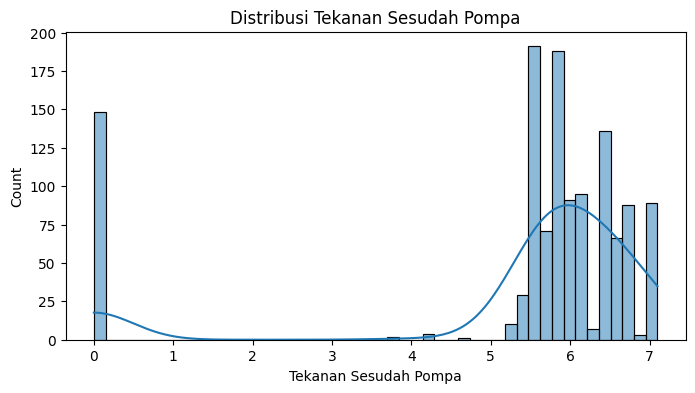

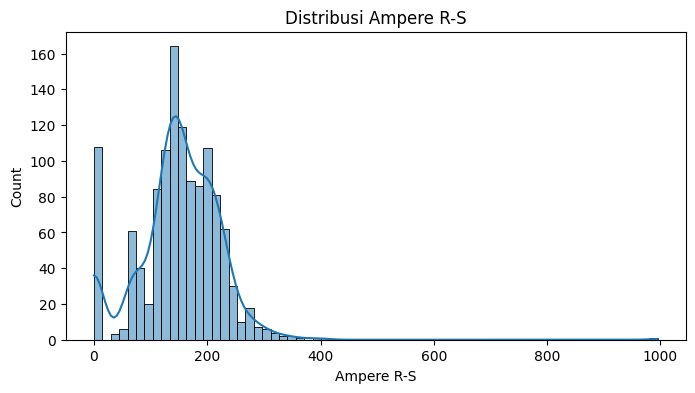

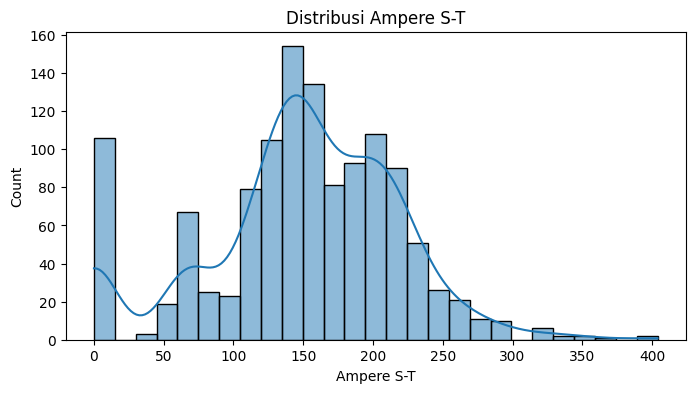

In [3]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tampilan matplotlib
%matplotlib inline

# Menampilkan informasi dasar tentang dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Memeriksa missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualisasi distribusi variabel numerik
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()

## 3. Feature Selection

Feature selection adalah proses memilih fitur yang paling relevan untuk digunakan dalam model Machine Learning. Dalam konteks Simple Linear Regression, yang merupakan metode regresi paling dasar dan mengasumsikan hubungan linear antara satu fitur independen dan variabel dependen (target), feature selection menjadi sangat penting untuk memastikan efektivitas dan efisiensi model.

**Target: Ampere Kompressor**

**Ampere Kompressor** mengukur arus listrik yang dikonsumsi oleh kompressor. Dalam konteks chiller, ini adalah indikator penting dari konsumsi energi. Mengoptimalkan konsumsi energi kompressor tidak hanya menghemat biaya tetapi juga dapat meningkatkan umur peralatan dan efisiensi operasional.

**Fitur dan Pengaruhnya**
1. **Cond Sat Temperature (Suhu Jenuh Kondensator)**
  * Pengaruh: Suhu jenuh kondensator yang lebih tinggi dapat menunjukkan bahwa kondensator harus mengeluarkan lebih banyak panas, yang mengakibatkan kompressor bekerja lebih keras. Ini sering terkait dengan kondisi lingkungan atau beban pendinginan yang tinggi.
  * Analisis: Menganalisis korelasi antara suhu jenuh kondensator dan ampere kompressor akan membantu memahami seberapa efisien kondensator bekerja dan bagaimana hal ini mempengaruhi konsumsi energi kompressor.
2. **Discharge Temperature (Suhu Pembuangan)**
  * Pengaruh: Suhu pembuangan tinggi biasanya mengindikasikan bahwa kompressor bekerja lebih keras, yang meningkatkan konsumsi energi. Hal ini bisa disebabkan oleh berbagai faktor, termasuk beban termal tinggi, kondisi operasional yang tidak optimal, atau isu pemeliharaan.
  * Analisis: Dengan menganalisis hubungan antara suhu pembuangan dan ampere kompressor, kita dapat mengidentifikasi kondisi di mana efisiensi energi berkurang.

3. **Oil Pressure (Tekanan Oli)**
  * Pengaruh: Tekanan oli yang tidak optimal bisa menyebabkan peningkatan gesekan dan keausan pada kompresor, yang mempengaruhi efisiensi dan konsumsi energinya. Tekanan yang terlalu rendah atau terlalu tinggi sama-sama merugikan.
  * Analisis: Melalui regresi linear, kita dapat menilai seberapa signifikan pengaruh tekanan oli terhadap konsumsi energi kompressor dan menentukan nilai tekanan oli optimal untuk efisiensi maksimal.
  
Dalam konteks pabrik, pemahaman ini sangat berguna untuk mengidentifikasi area di mana efisiensi dapat ditingkatkan, baik melalui pengaturan operasional, pemeliharaan rutin, atau upgrade peralatan. Dengan menerapkan model regresi linear, Anda dapat mengquantifikasi hubungan ini dan menggunakan wawasan tersebut untuk membuat keputusan yang lebih tepat dan efektif dalam mengelola sistem chiller.

**ChatGPT Prompt:**

Berikan code untuk membagi dataset menjadi data training dan testing untuk machine learning. Atur kolom "Cond Sat Temperature" menjadi fitur dan kolom "Ampere Kompressor" menjadi target


In [4]:
from sklearn.model_selection import train_test_split

# Menentukan fitur dan target
X = df[['Cond Sat Temperature']]  # Fitur (dalam bentuk DataFrame)
y = df['Ampere Kompressor']           # Target

# Membagi dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data training dan testing
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (975, 1)
Ukuran X_test: (244, 1)
Ukuran y_train: (975,)
Ukuran y_test: (244,)


## 4. Training Machine Learning

Untuk melatih model regresi linier menggunakan dataset yang Anda miliki dan kemudian mengevaluasi model tersebut, Anda dapat menggunakan library scikit-learn di Python. Langkah-langkahnya termasuk melatih model dengan data training (X_train dan y_train) dan kemudian mengevaluasi kinerjanya dengan data testing (X_test dan y_test).

**ChatGPT Prompt:**

Berikan code untuk melakukan training machine learning dengan linear regresi dan evaluasi model machine learning pada dataset

In [5]:
# Import library yang diperlukan
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Membuat instance model regresi linier
model = LinearRegression()

# Melatih model dengan data training
model.fit(X_train, y_train)

# Memprediksi nilai target dengan data testing
y_pred = model.predict(X_test)

# Menghitung dan menampilkan metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 192.44112672000787
R^2 Score: 0.9225408701446582


Dalam kode ini:

* **LinearRegression()** digunakan untuk membuat instance model regresi linier.
* **fit** digunakan untuk melatih model dengan data training.
* **predict** digunakan untuk membuat prediksi pada data testing.
* **mean_squared_error** dan **r2_score** digunakan untuk menghitung metrik evaluasi. Mean Squared Error (MSE) adalah rata-rata kuadrat error antara nilai sebenarnya dan nilai prediksi, sedangkan R^2 Score (koefisien determinasi) mengukur seberapa baik model dapat menjelaskan variabilitas data.

Metrik evaluasi ini memberikan informasi tentang kinerja model. MSE yang rendah dan R^2 yang tinggi menunjukkan model yang lebih baik. Namun, interpretasi metrik ini juga harus mempertimbangkan konteks dan jenis data yang digunakan.

## 5. Actual vs Predicted

**ChatGPT Prompt:**

Berikan code untuk menampilkan data prediksi dari hasil linear regression dengan data sebenarnya

In [6]:
# Memprediksi nilai target dengan data testing
y_pred = model.predict(X_test)

# Membuat DataFrame untuk membandingkan nilai sebenarnya dan prediksi
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Menampilkan beberapa baris pertama dari DataFrame
print(comparison_df.head())


      Actual   Predicted
542    126.9  124.306366
259    133.0  129.484553
43       0.2   -7.936563
1009   147.7  152.587233
753    118.2  113.153348


**ChatGPT Prompt**

Berikan code untuk menampilkan scatter plot dari linear regression yang telah dilatih

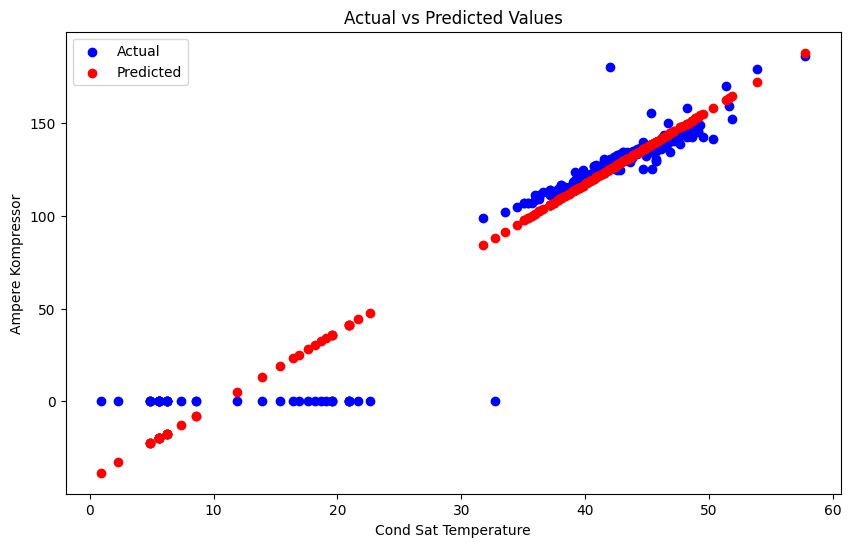

In [14]:
# Import library matplotlib
import matplotlib.pyplot as plt

# Memprediksi nilai target dengan data testing
y_pred = model.predict(X_test)

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')

# Menambahkan judul dan label
plt.title('Actual vs Predicted Values')
plt.xlabel('Cond Sat Temperature')
plt.ylabel('Ampere Kompressor')
plt.legend()

# Menampilkan plot
plt.show()


**ChatGPT Prompt:**

Berikan code untuk melakukan prediksi nilai baru misalkan nilai Cond Sat Temperature = 42.5 pada model machine learning yang telah dibuat

In [8]:
# Mengimpor library yang diperlukan
import numpy as np

# Nilai "Cond Sat Temperature" yang ingin diprediksi
nilai_baru = np.array([[42.5]])

# Melakukan prediksi menggunakan model
prediksi = model.predict(nilai_baru)

print("Prediksi untuk nilai 42.5:", prediksi[0])


Prediksi untuk nilai 42.5: 127.09462029164443


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
